### Regressão linear

Queremos desenvolver um modelo linear que prevê $f_{w,b}(x^{(i)})$. Na qual podemos representar do seguinte modo:

$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

Nosso objetivo é encontrar os valores de $w$ e $b$. Uma forma de fazer isso é minimizando uma medida de erro entre as previsões $f_{w,b}(x^{(i)})$ e o verdadeiro valor $y^{(i)}$.

A função de custo, utilizando o erro quadrático médio, é dada por:

  $$J(w,b) = \frac{1}{2n} \sum\limits_{i = 0}^{n-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{2}$$ 
 
na qual 
  
- $f_{w,b}(x^{(i)})$ é a nossa predição para o exemplo $i$ usando os parâmentros $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ é a diferença ao quadrado entre o valor predito e o valor verdadeiro.


Na regressão linear, utilizamos os dados de treinamento para ajustar os parâmetros $w$ e $b$, a fim de minimizar a função de custo $J(w,b)$. Para encontrar os valores dos parâmetros, utilizamos o método de gradiente descendente.

#### Derivadas

As derivadas nos ajudam a encontrar o mínimo da função de custo. Deste modo, as derivadas parciais da função de custo $J(w,b)$ em relação $w$ e a $b$ são dadas por:

$$\frac{\partial J(w, b)}{\partial w} = \frac{\partial}{\partial w} \left( \frac{1}{2n} \sum\limits_{i = 0}^{n-1} (wx^{(i)} + b - y^{(i)})^2 \right)$$

$$\frac{\partial J(w, b)}{\partial w} = \frac{1}{2n} \sum\limits_{i = 0}^{n-1} 2(wx^{(i)} + b - y^{(i)}) \cdot \frac{\partial}{\partial w}(wx^{(i)} + b - y^{(i)})$$

$$\frac{\partial J(w, b)}{\partial w} = \frac{1}{n} \sum\limits_{i=0}^{n-1} (wx^{(i)} + b - y^{(i)}) \cdot x^{(i)} \tag{3}$$


$$\frac{\partial J(w, b)}{\partial b} = \frac{\partial}{\partial b} \left( \frac{1}{2n} \sum\limits_{i = 0}^{n-1} (wx^{(i)} + b - y^{(i)})^2 \right)$$

$$\frac{\partial J(w, b)}{\partial b} = \frac{1}{2n} \sum\limits_{i = 0}^{n-1} 2(wx^{(i)} + b - y^{(i)}) \cdot \frac{\partial}{\partial b}(wx^{(i)} + b - y^{(i)})$$

$$\frac{\partial J(w, b)}{\partial b} = \frac{1}{n} \sum\limits_{i=0}^{n-1} (wx^{(i)} + b - y^{(i)})\tag{4}$$


#### Atualização dos Parâmetros

Os parâmetros $w$ e $b$ são atualizados simultaneamente da seguinte maneira:

$$w = w - \alpha \frac{\partial J(w, b)}{\partial w} \tag{5}$$

$$b = b - \alpha \frac{\partial J(w, b)}{\partial b} \tag{6}$$

onde $\alpha$ é a taxa de aprendizado, que controla o tamanho dos passos de atualização dos parâmetros.

O processo é repetido iterativamente até que a função de custo $J(w, b)$ atinja um valor mínimo.


In [11]:
import numpy as np
import matplotlib.pyplot as plt

from linear_regression import LinearRegression

# Dados de exemplo
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [16]:
model = LinearRegression(learning_rate=1.0e-2, iterations=10000)
w_final, b_final, J_cost_values, p_hist = model.fit(X, y)


print("Valores dos parâmetros (w, b):", (model.w, model.b))

Valores dos parâmetros (w, b): (2.770113423305904, 4.215096115791722)


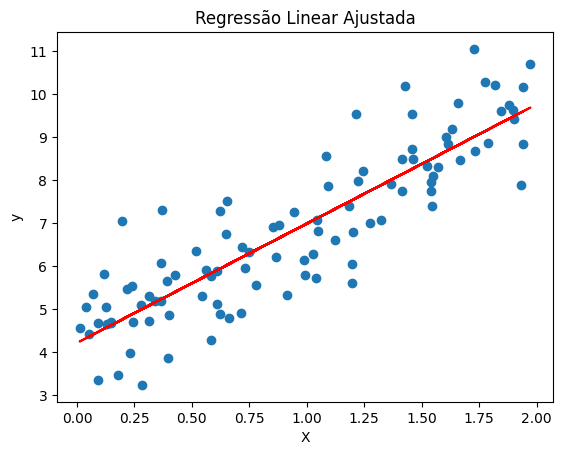

In [17]:
# Regressão linear ajustada

plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Regressão Linear Ajustada")
plt.show()

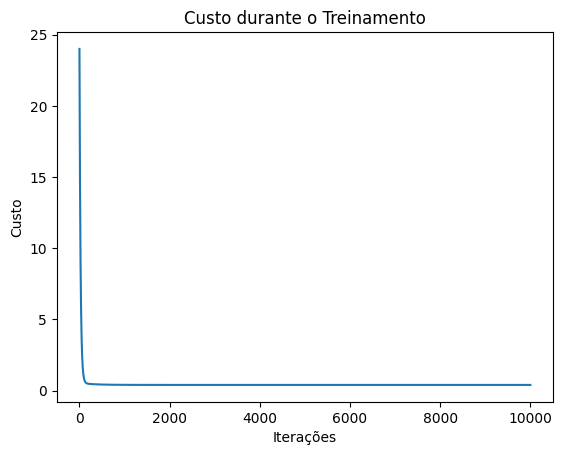

In [13]:
# Visualizar o histórico de custo
plt.plot(range(model.iterations), J_cost_values)
plt.xlabel("Iterações")
plt.ylabel("Custo")
plt.title("Custo durante o Treinamento")
plt.show()